In [47]:
import utils

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import AgglomerativeClustering

from numpy.random import default_rng

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# pre_to_mn_df = connectome_create.load_pre_to_mn_df(ext='matched_typed_with_nt')
pre_to_mn_df = pd.read_pickle('./dfs_pre_to_mn/pre_to_mn_df_matched_typed_with_nt_v840.pkl')
pre_to_mn_df.shape

(1546, 69)

# Figure 2
1. Connectivity matrix
2. Numbers of each class

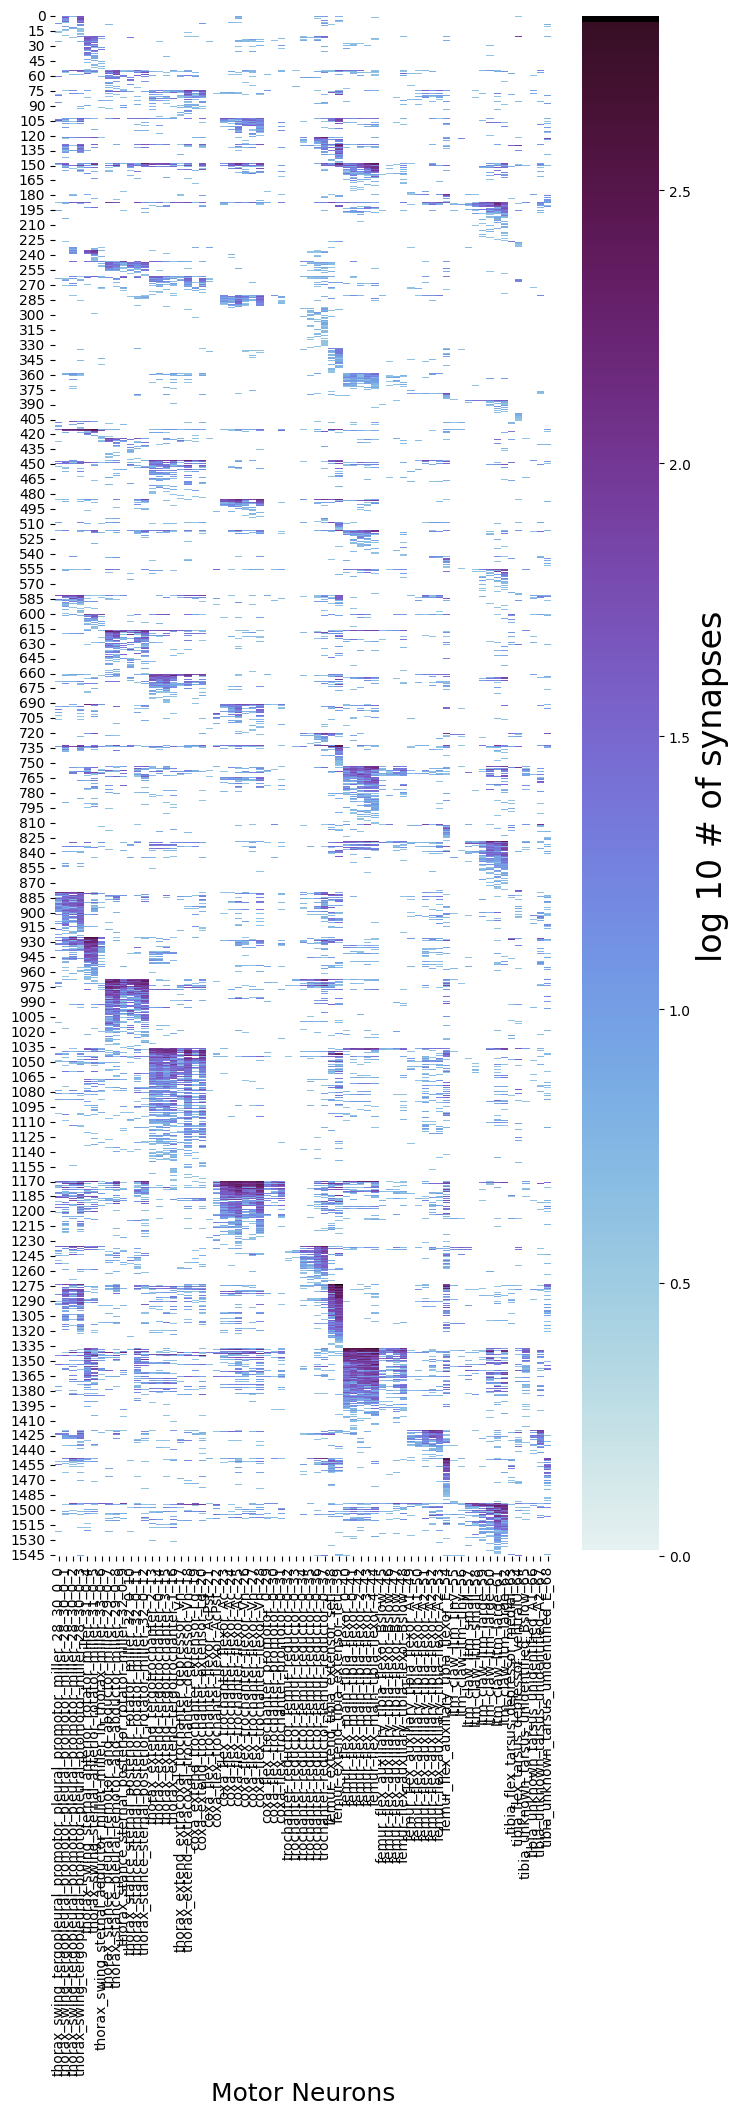

In [4]:
lbls = utils.mn_labels(pre_to_mn_df.columns.to_frame(),depth='rank')


fig = plt.figure(1, figsize = [8,20])
import cmocean
cmap_alt = cmocean.cm.dense
cmap = utils.white_dense()
ax = sns.heatmap(np.log10(pre_to_mn_df.to_numpy()+1), xticklabels=lbls, cmap=cmap)
ax.set_rasterized(True)
cbar = ax.collections[0].colorbar
# here set the labelsize by 20
# cbar.ax.tick_params(labelsize=20)
cbar.set_label(label = 'log 10 # of synapses', size=24)
plt.xlabel('Motor Neurons', fontsize =18)

plt.show()


fig.savefig('./figpanels/matched_premotor_to_motor.eps',format='eps',dpi=300, bbox_inches='tight')
# plt.savefig('wingConnMatrix0110.eps', format='eps', bbox_inches='tight')
# fig.savefig('./figpanels/matched_premotor_to_motor.png',format='png')

## Number of partners

In [6]:
# total number of synapses from actual neurons (no fragments)
pre_to_mn_df.loc[(['local','intersegmental','ascending','sensory','descending'])].sum(axis=0).max()

12702

161.3913043478261

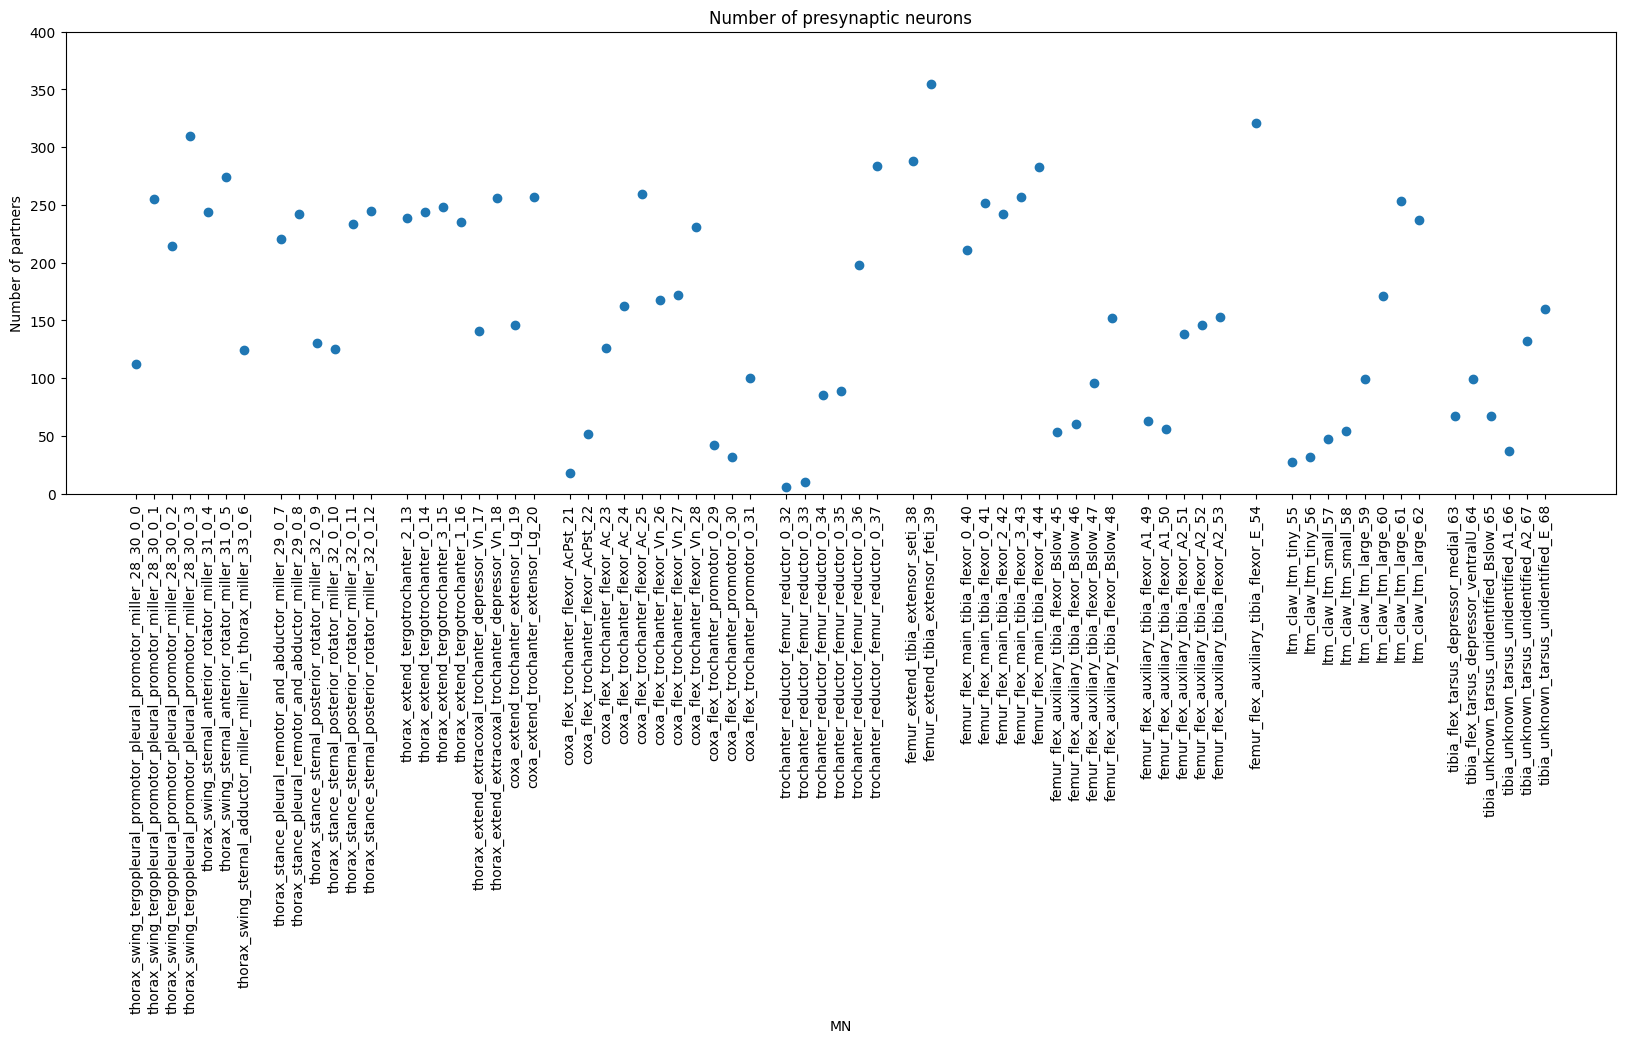

In [8]:
# Double check the order of the neurons
x = utils.xticks_from_pools(pre_to_mn_df.columns.to_frame())
lbls = utils.mn_labels(pre_to_mn_df.columns.to_frame(),depth='rank')
mat = pre_to_mn_df.to_numpy()
y = pre_to_mn_df.astype(bool).sum(axis=0).to_numpy()

fig = plt.figure(1, figsize=(20, 6))
ax1 = plt.subplot2grid((1,1),(0,0))

ax1.scatter(x, y,marker='o')
plt.sca(ax1)
plt.title('Number of presynaptic neurons')
plt.xlabel('MN')
plt.ylabel('Number of partners')
locs, labels = plt.xticks(ticks=x, labels=lbls, rotation=90)

ax1.set_ylim([0, 400])

plt.savefig('./figpanels/total_partners.svg',format='svg')

# mean number of partners
y.mean()
# max number of partners
# y.max()

## Number of targets per preMN

7.203104786545925

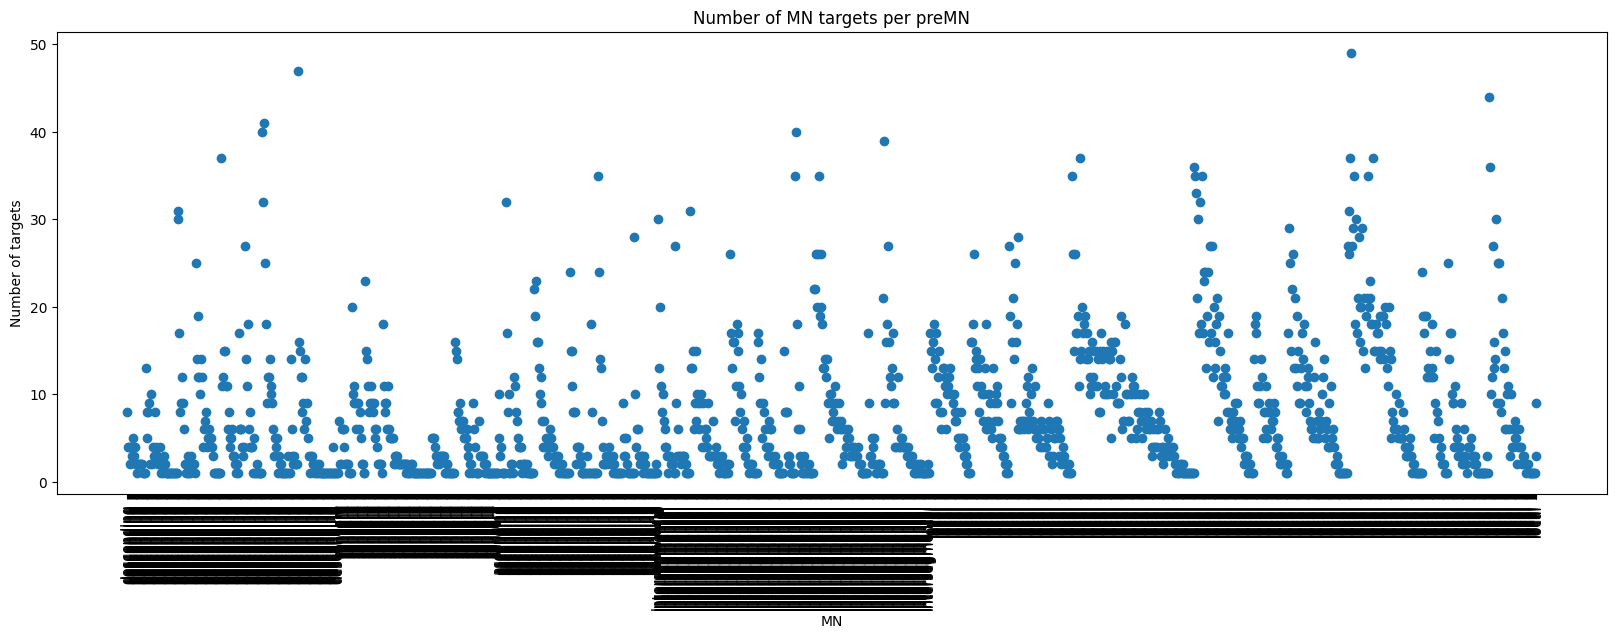

In [9]:
pre_to_mn_df.head()
partners = pre_to_mn_df.loc[(['local','intersegmental','ascending','sensory','descending'])].astype(bool).groupby(by='cell_class',axis=0).sum()
# mean numbers of targets partners
y = pre_to_mn_df.astype(bool).sum(axis=1).to_numpy()

x = [i for i in range(len(pre_to_mn_df.index.to_frame()['cell_class'].values))]
lbls = pre_to_mn_df.index.to_frame()['cell_class'].values

fig = plt.figure(1, figsize=(20, 6))
ax1 = plt.subplot2grid((1,1),(0,0))

ax1.scatter(x, y,marker='o')
plt.sca(ax1)
plt.title('Number of MN targets per preMN')
plt.xlabel('MN')
plt.ylabel('Number of targets')
locs, labels = plt.xticks(ticks=x, labels=lbls, rotation=90)

# ax1.set_ylim([0, 400])

plt.savefig('./figpanels/total_partners.svg',format='svg')

# mean number of partners
y.mean()
# max number of partners
# y.max()

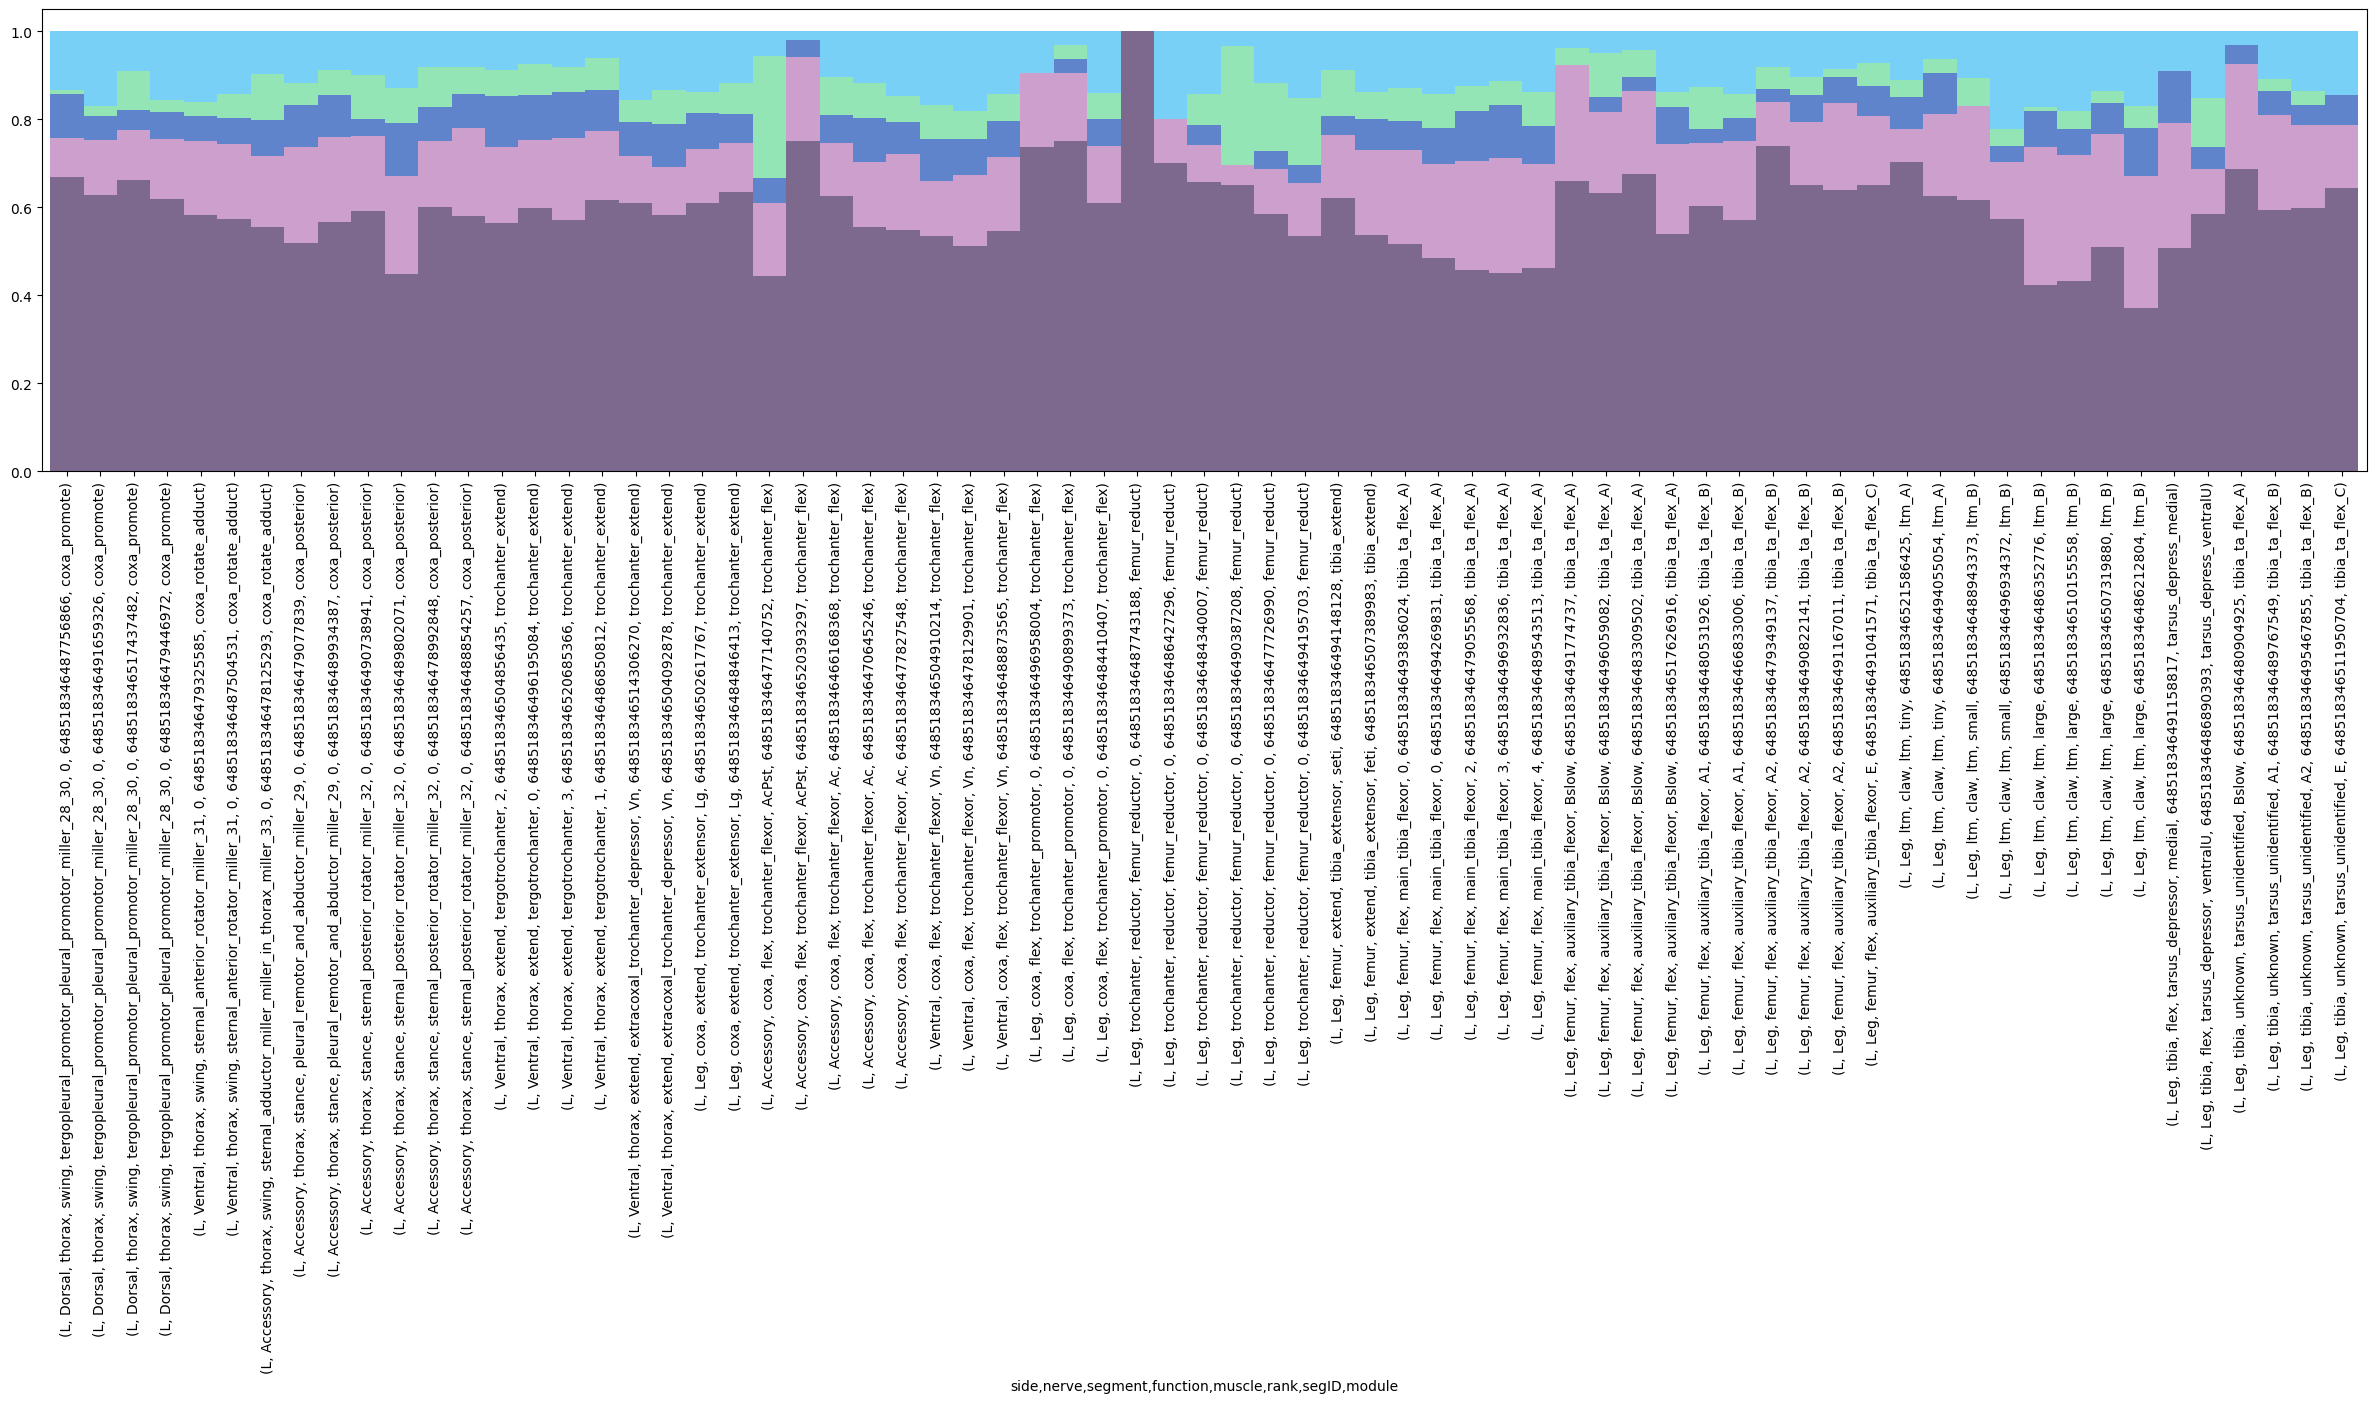

In [10]:
mn_mi = partners.columns.to_frame()
x = utils.xticks_from_mnmi(mn_mi)

partners = pre_to_mn_df.loc[(['descending','sensory','ascending','intersegmental','local'])].astype(bool).groupby(by='cell_class',axis=0).sum()
partners = partners.div(partners.sum(axis=0))
partners = partners.loc[['descending','sensory','ascending','intersegmental','local'],:]

classlist = ['local', 'intersegmental', 'ascending', 'sensory', 'descending','fragment',]
colors = ["#7D688E",  "#CC9FCC",    "#6084CC",  "#93E5B6",  "#79D0F7",        "#dddddd", ]
cmap = sns.set_palette(sns.color_palette(colors))

ax = partners[::-1].T.plot(kind='bar', stacked=True, legend = False,width=1,cmap=cmap,figsize=(30,6)) 
plt.savefig('./figpanels/prepartners_from_cell_classes.svg',format='svg')

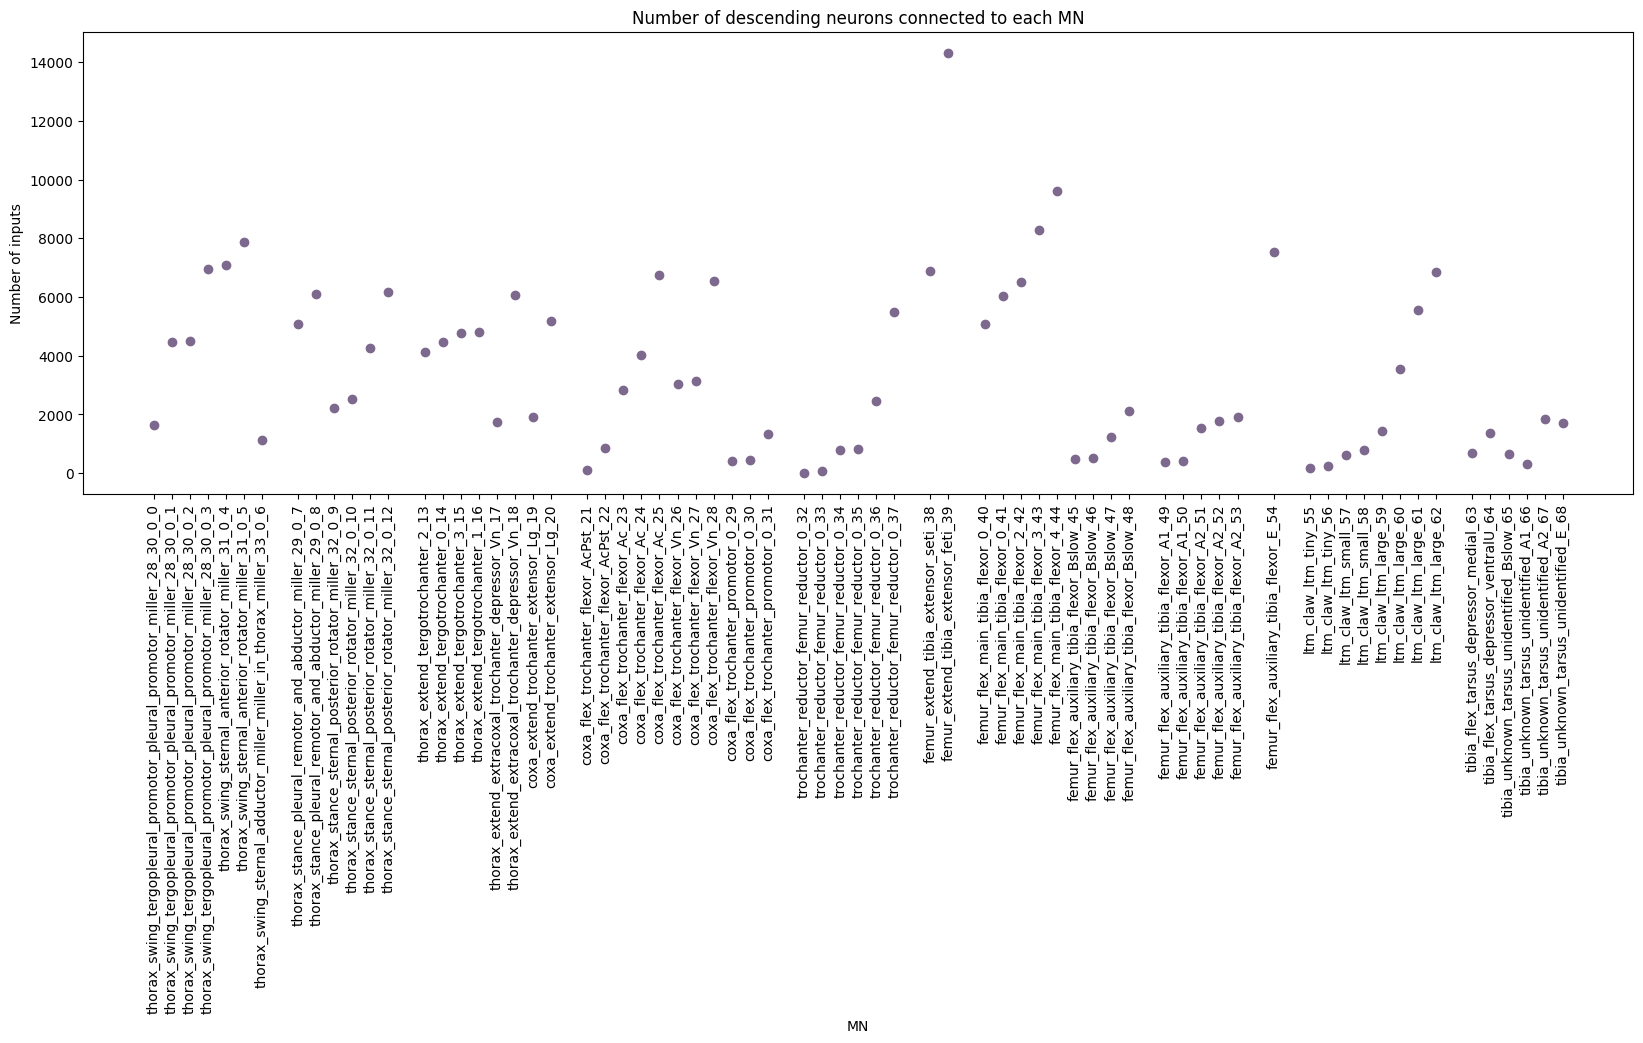

In [12]:
# all_pre_to_mn_df = connectome_create.load_pre_to_mn_df('pre_match_to_pool_w_fragments')
all_pre_to_mn_df = pd.read_pickle('./dfs_pre_to_mn/pre_to_mn_df_pre_match_to_pool_w_fragments_v840.pkl')

# Double check the order of the neurons
x = utils.xticks_from_mnmi(mn_mi)
x = utils.xticks_from_pools(mn_mi)
lbls = utils.mn_labels(mn_mi,depth='rank')
mat = all_pre_to_mn_df.to_numpy()
y = mat.sum(axis=0)

fig = plt.figure(1, figsize=(20, 6))
ax1 = plt.subplot2grid((1,1),(0,0))

ax1.scatter(x, y,marker='o')
plt.sca(ax1)
plt.title('Number of descending neurons connected to each MN')
plt.xlabel('MN')
plt.ylabel('Number of inputs')
locs, labels = plt.xticks(ticks=x, labels=lbls, rotation=90)

plt.savefig('./figpanels/total_inputs.svg',format='svg')

## Fraction of total input from each cell_class

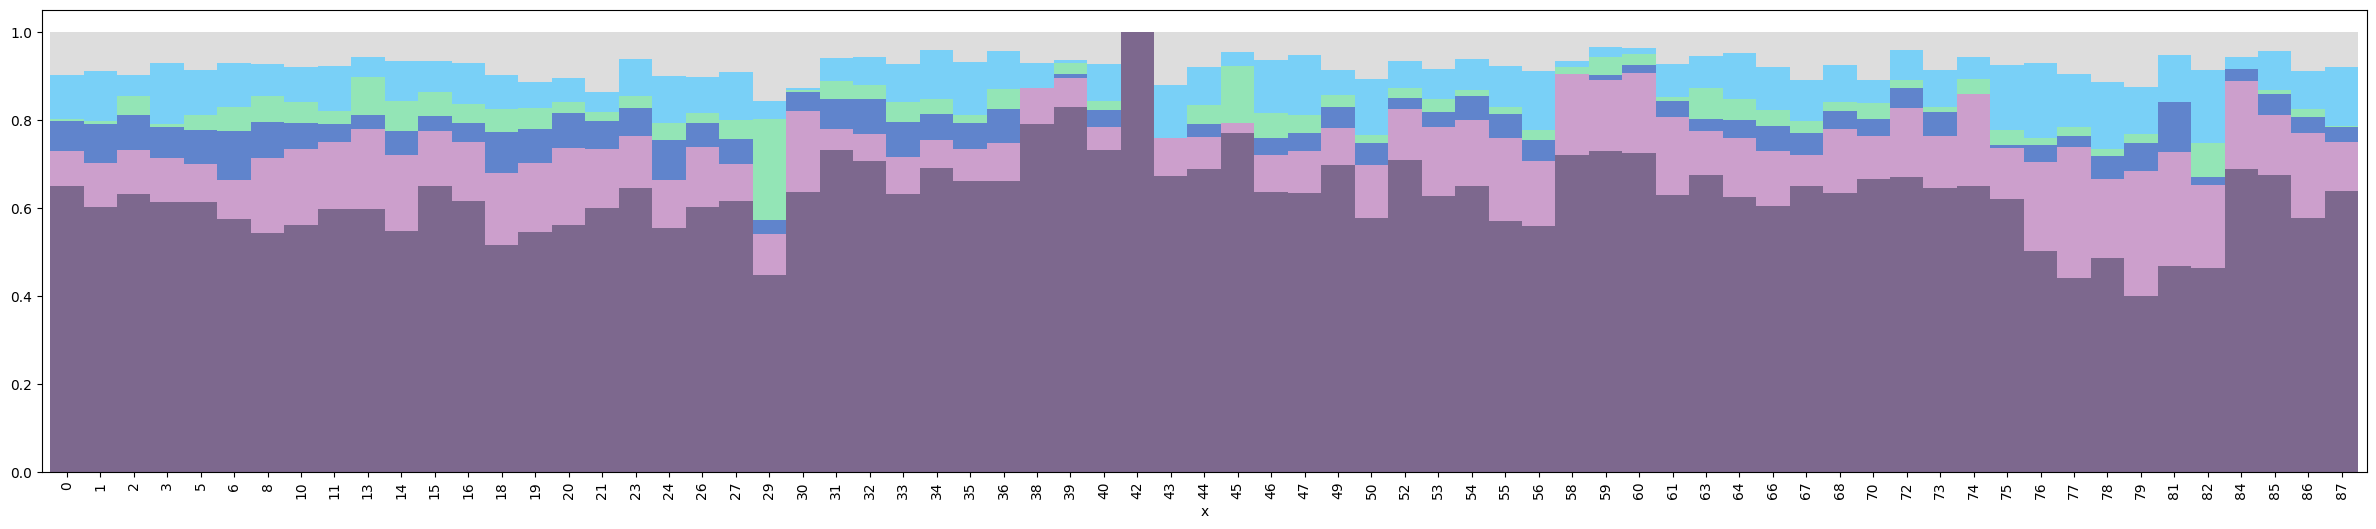

In [13]:
mn_mi = all_pre_to_mn_df.columns.to_frame()
x = utils.xticks_from_mnmi(mn_mi)

frac_df = pd.DataFrame(index=['fragment','descending','sensory','ascending','intersegmental','local','x'],columns=pre_to_mn_df.columns)
frac_df.loc['fragment',:] = all_pre_to_mn_df.loc['fragment'].sum(axis=0)
frac_df.loc['descending',:] = all_pre_to_mn_df.loc['descending'].sum(axis=0)
frac_df.loc['sensory',:] = all_pre_to_mn_df.loc['sensory'].sum(axis=0)
frac_df.loc['ascending',:] = all_pre_to_mn_df.loc['ascending'].sum(axis=0)
frac_df.loc['intersegmental',:] = all_pre_to_mn_df.loc['intersegmental'].sum(axis=0)
frac_df.loc['local',:] = all_pre_to_mn_df.loc['local'].sum(axis=0)
# frac_df.loc['motor',:] = mns.sum(axis=0)
frac_df = frac_df/frac_df.sum(axis=0)
frac_df.loc['x',:] = x

# sns.set(rc = {'figure.figsize':(15,8)})


# # locs, labels = plt.xticks(ticks=x, labels=lbls, rotation=90)
          #'motor', 'nont1',    'desc',     'sens',     'ascend',   'local',    'intr',     'vnc',      'fragments'
classlist = ['motor', 'descending', 'sensory', 'ascending', 'intersegmental','local',   'non_t1_motor', 'descending_post',  'sensory_post','ascending_post','neurmodulatory_ascending_neuron', 'vnc_non_premotor']
colors = ["#910951",  "#79D0F7",    "#93E5B6",  "#6084CC",  "#CC9FCC",        "#7D688E", "#CC4893",      '#79D0F7',          "#93E5B6",      "#6084CC",      "#CC4893",                          "#CC9FCC"]
classlist = ['fragment', 'descending', 'sensory', 'ascending', 'intersegmental','local',]
colors = ["#dddddd",  "#79D0F7",    "#93E5B6",  "#6084CC",  "#CC9FCC",        "#7D688E", ]
classlist = ['local', 'intersegmental', 'ascending', 'sensory', 'descending','fragment',]
colors = ["#7D688E",  "#CC9FCC",    "#6084CC",  "#93E5B6",  "#79D0F7",        "#dddddd", ]
cmap = sns.set_palette(sns.color_palette(colors))

# ax = frac_df.T.plot(x='x',kind='barh', stacked=True, legend = True,align='edge') 
ax = frac_df[::-1].T.plot(x='x',kind='bar', stacked=True, legend = False,width=1,cmap=cmap,figsize=(30,6)) 
# Most of them are pretty close to 1

# ax = frac_df.iloc[::-1].T.plot(x='x',kind='bar', stacked=True, legend = True) #, color=['aqua','red', 'steelblue','orange','yellow'])
# locs, labels = plt.xticks(ticks=[i for i in range(len(lbls))], labels=lbls, rotation=90)
plt.savefig('./figpanels/input_from_cell_classes.svg',format='svg')

## Total fractional input from each class 

### Pie chart  

In [14]:
piesums = all_pre_to_mn_df.groupby(level='cell_class').sum().sum(axis=1)
piesums = piesums.loc[['local','intersegmental','motor','fragment','descending','sensory','ascending']]
print(piesums.sum())
piesums


232530


cell_class
local             140124
intersegmental     30381
motor                584
fragment           19349
descending         21497
sensory             7366
ascending          13229
dtype: int64

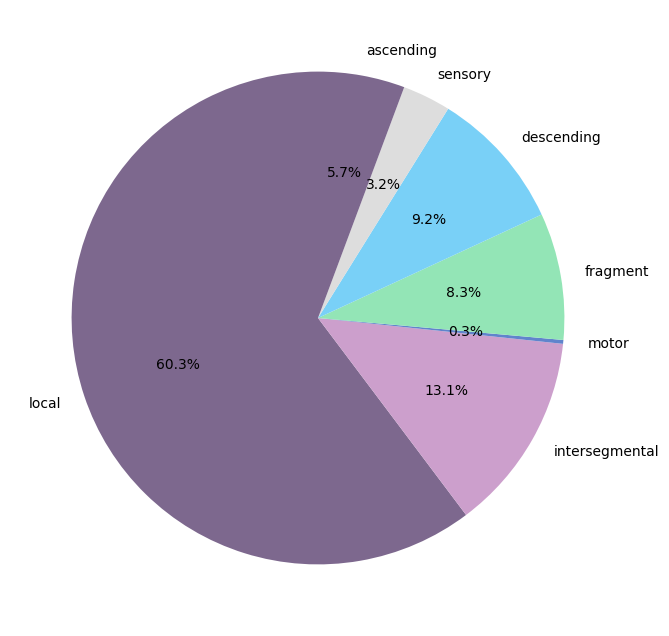

In [15]:
fig, ax = plt.subplots( 1, 1, figsize=(8,8))
ax.pie(piesums, explode=None, labels=piesums.index, autopct='%1.1f%%',
              shadow=False, startangle=90)

fname = './figpanels/class_input_to_mns_pie.svg'
fig.savefig(fname,format='svg')

## Total synapses

In [16]:
print('Total synapses: {}'.format(piesums.sum()))

Total synapses: 232530


# Total sysnapses to FETi that are not fragments

In [17]:
all_pre_to_mn_df.loc[(['local','intersegmental','ascending','sensory','descending'])].sum(axis=0).max()

12748

## Now print the segids for 13A as an example, then color them in neuroglancer

In [29]:
import utils
All = slice(None)
pmn_index = pre_to_mn_df.index.to_frame()
pmn_index_df = pmn_index.set_index(keys=['cell_class','preferred_pool','classification_system','cell_type'],drop=False)
eg13A = pmn_index_df.loc[('local',All,'13A', All,),:]
pks = eg13A.preferred_pool.unique()

pool_pal = utils.pool_palette()

print('"segmentColors": {')    
for pl in eg13A.preferred_pool.unique():
    print(pl)
    for s in eg13A.loc[(All,pl,All),'segID'].to_list():
        print('"{}": "{}",'.format(s,pool_pal[pl]))
print('"segments": {')    
for pl in eg13A.preferred_pool.unique():
    for s in eg13A.loc[(All,pl,All),'segID'].to_list():
        print('"{}",'.format(s))


"segmentColors": {
coxa_promote
"648518346504048078": "#F47A00",
"648518346508904255": "#F47A00",
"648518346499451995": "#F47A00",
"648518346494103051": "#F47A00",
"648518346487588778": "#F47A00",
"648518346494105611": "#F47A00",
"648518346501827657": "#F47A00",
"648518346514331335": "#F47A00",
"648518346500029439": "#F47A00",
coxa_rotate_adduct
"648518346487654612": "#F0A968",
"648518346482173076": "#F0A968",
"648518346497975655": "#F0A968",
"648518346500657624": "#F0A968",
"648518346503987240": "#F0A968",
coxa_posterior
"648518346503131515": "#00A2B4",
"648518346477777628": "#00A2B4",
"648518346509721475": "#00A2B4",
trochanter_extend
"648518346500132614": "#D5CB6C",
"648518346517571364": "#D5CB6C",
"648518346496087564": "#D5CB6C",
"648518346490517084": "#D5CB6C",
"648518346486970083": "#D5CB6C",
"648518346479107791": "#D5CB6C",
"648518346497160600": "#D5CB6C",
"648518346486288482": "#D5CB6C",
"648518346520465718": "#D5CB6C",
"648518346473216868": "#D5CB6C",
"648518346488889437": "#D

## All

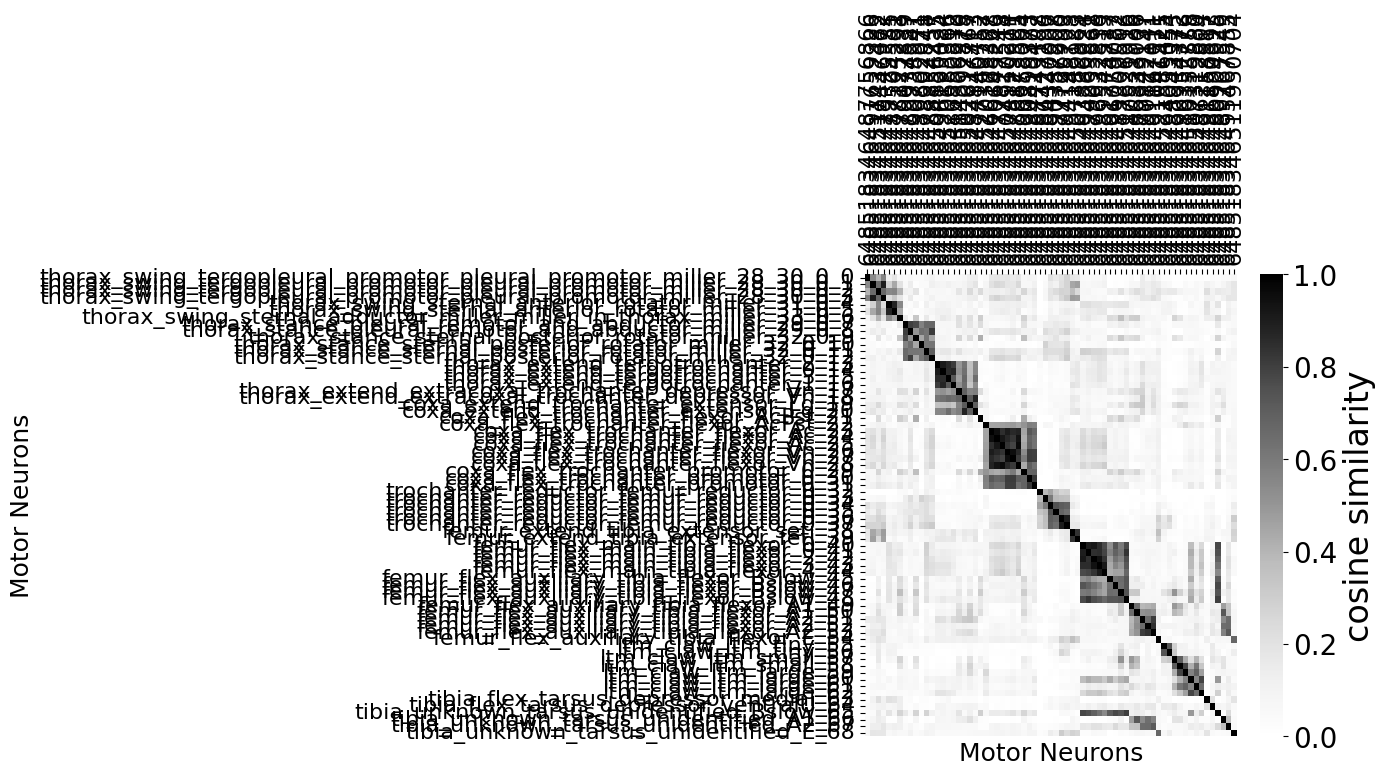

In [23]:
# Cluster according to everything but fragments
mn_mi = pre_to_mn_df.columns.to_frame()
lbls = utils.mn_labels(mn_mi,depth='rank')

sim_mat = cosine_similarity(pre_to_mn_df.to_numpy().transpose())
fig = plt.figure(1, figsize = [6,6])
ax = sns.heatmap(sim_mat, xticklabels=mn_mi.segID.to_list(), yticklabels=lbls,cmap=plt.get_cmap('Greys'))
ax.xaxis.set_ticks_position('top')
cbar = ax.collections[0].colorbar
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

# here set the labelsize by 20
cbar.ax.tick_params(labelsize=20)
cbar.set_label(label = 'cosine similarity', size=24)
plt.xlabel('Motor Neurons', fontsize =18)
plt.ylabel('Motor Neurons', fontsize =18)
plt.yticks(fontsize = 16)
plt.xticks(fontsize = 16)
plt.show()

fig.savefig('./figpanels/cos_sim_all_grayscale.svg',format='svg')

## Local

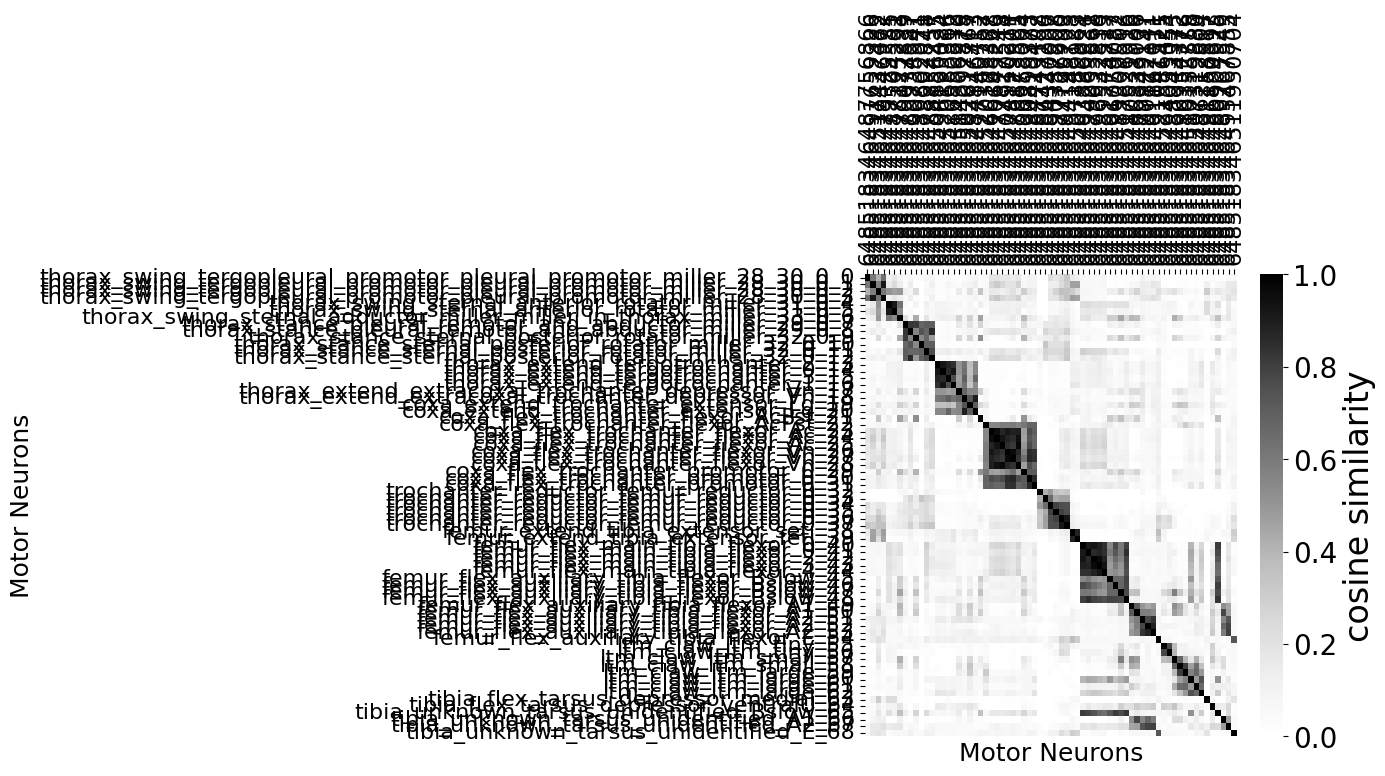

In [24]:
# Cluster according to everything but fragments
mn_mi = pre_to_mn_df.columns.to_frame()
lbls = utils.mn_labels(mn_mi,depth='rank')

sim_mat = cosine_similarity(pre_to_mn_df.loc['local',:].to_numpy().transpose())
fig = plt.figure(1, figsize = [6,6])
ax = sns.heatmap(sim_mat, xticklabels=mn_mi.segID.to_list(), yticklabels=lbls,cmap=plt.get_cmap('Greys'))
ax.xaxis.set_ticks_position('top')
cbar = ax.collections[0].colorbar
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

# here set the labelsize by 20
cbar.ax.tick_params(labelsize=20)
cbar.set_label(label = 'cosine similarity', size=24)
plt.xlabel('Motor Neurons', fontsize =18)
plt.ylabel('Motor Neurons', fontsize =18)
plt.yticks(fontsize = 16)
plt.xticks(fontsize = 16)
plt.show()

fig.savefig('./figpanels/cos_sim_local_grayscale.svg',format='svg')

## Intersegmental

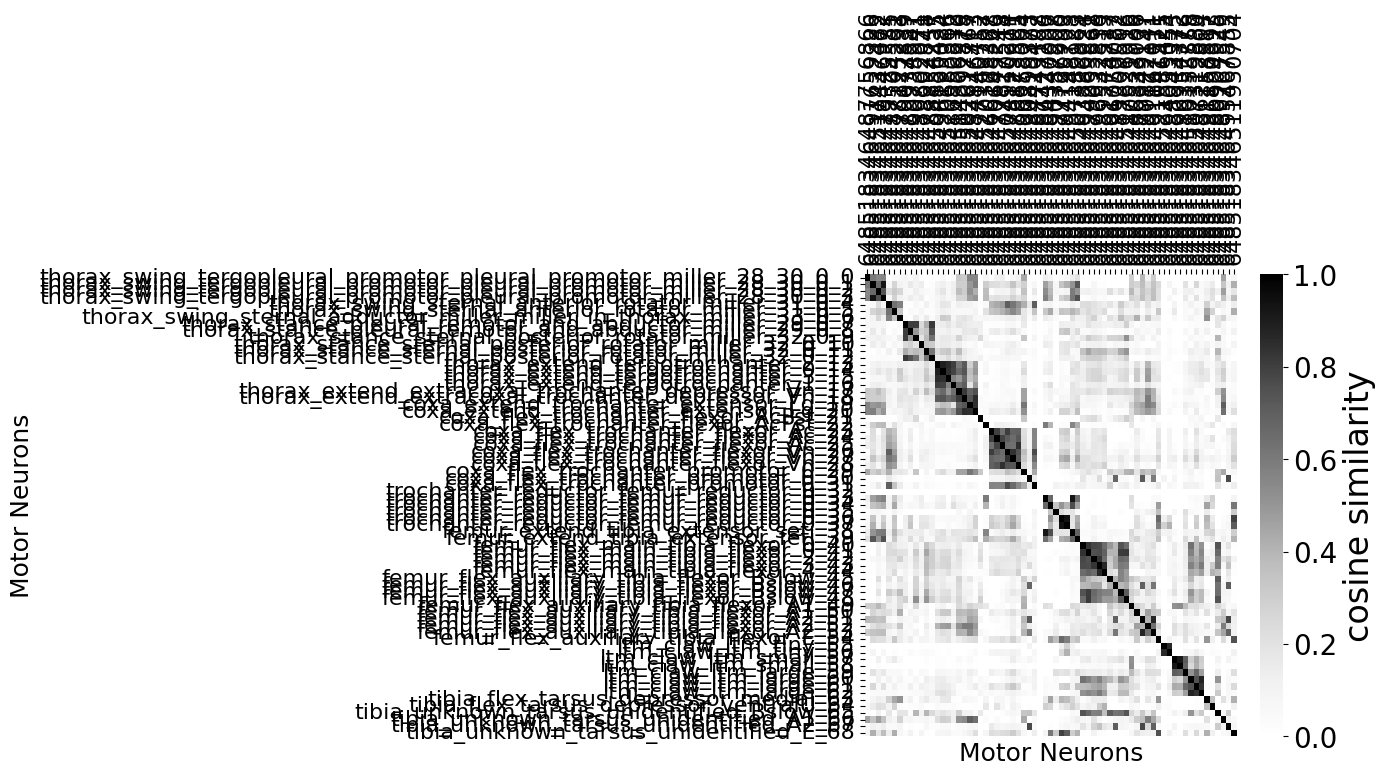

In [25]:
# Cluster according to everything but fragments
mn_mi = pre_to_mn_df.columns.to_frame()
lbls = utils.mn_labels(mn_mi,depth='rank')

sim_mat = cosine_similarity(pre_to_mn_df.loc['intersegmental',:].to_numpy().transpose())
fig = plt.figure(1, figsize = [6,6])
ax = sns.heatmap(sim_mat, xticklabels=mn_mi.segID.to_list(), yticklabels=lbls,cmap=plt.get_cmap('Greys'))
ax.xaxis.set_ticks_position('top')
cbar = ax.collections[0].colorbar
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

# here set the labelsize by 20
cbar.ax.tick_params(labelsize=20)
cbar.set_label(label = 'cosine similarity', size=24)
plt.xlabel('Motor Neurons', fontsize =18)
plt.ylabel('Motor Neurons', fontsize =18)
plt.yticks(fontsize = 16)
plt.xticks(fontsize = 16)
plt.show()

fig.savefig('./figpanels/cos_sim_intersegmental_grayscale.svg',format='svg')

## Descending

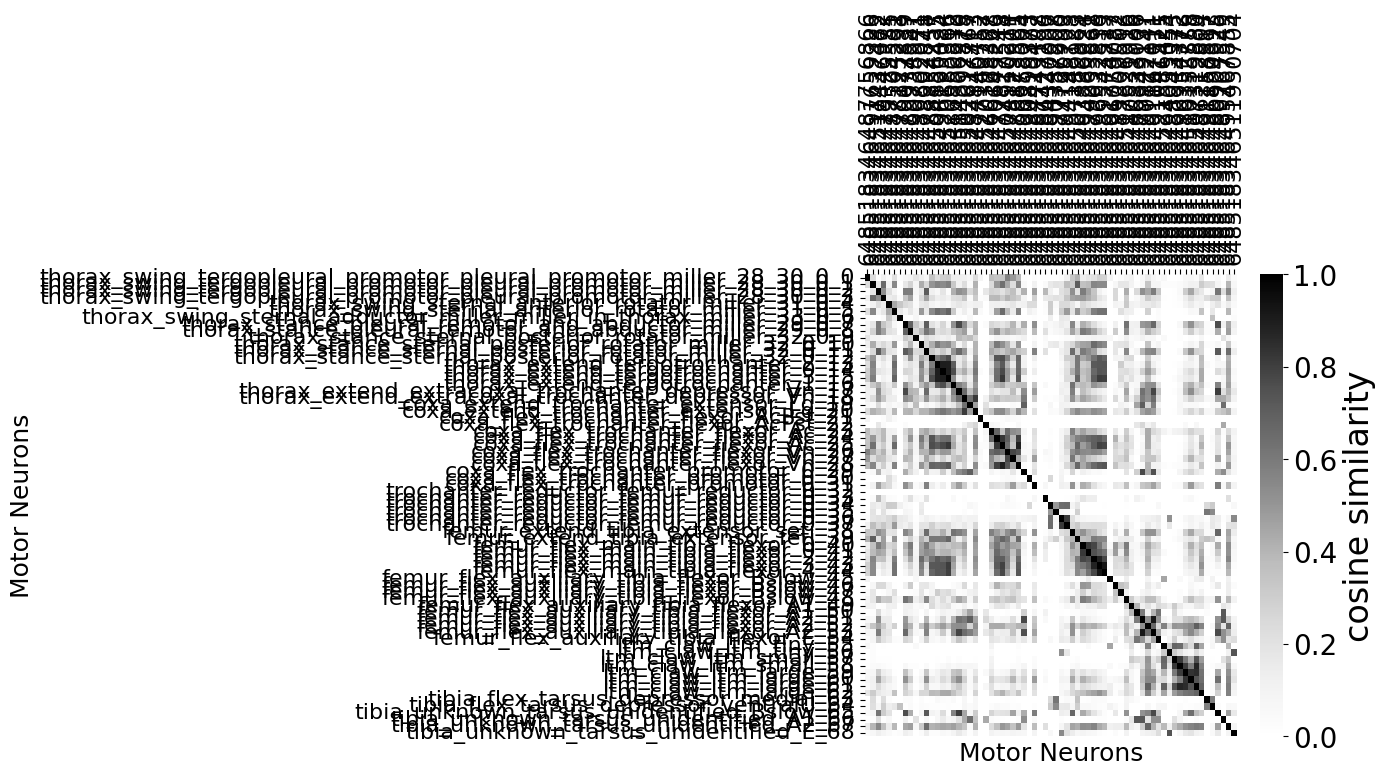

In [26]:
# Cluster according to everything but fragments
mn_mi = pre_to_mn_df.columns.to_frame()
lbls = utils.mn_labels(mn_mi,depth='rank')

sim_mat = cosine_similarity(pre_to_mn_df.loc['descending',:].to_numpy().transpose())
fig = plt.figure(1, figsize = [6,6])
ax = sns.heatmap(sim_mat, xticklabels=mn_mi.segID.to_list(), yticklabels=lbls,cmap=plt.get_cmap('Greys'))
ax.xaxis.set_ticks_position('top')
cbar = ax.collections[0].colorbar
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

# here set the labelsize by 20
cbar.ax.tick_params(labelsize=20)
cbar.set_label(label = 'cosine similarity', size=24)
plt.xlabel('Motor Neurons', fontsize =18)
plt.ylabel('Motor Neurons', fontsize =18)
plt.yticks(fontsize = 16)
plt.xticks(fontsize = 16)
plt.show()

fig.savefig('./figpanels/cos_sim_descending_grayscale.svg',format='svg')

## Ascending

In [ ]:
# Cluster according to everything but fragments
mn_mi = pre_to_mn_df.columns.to_frame()
lbls = utils.mn_labels(mn_mi,depth='rank')

sim_mat = cosine_similarity(pre_to_mn_df.loc['ascending',:].to_numpy().transpose())
fig = plt.figure(1, figsize = [6,6])
ax = sns.heatmap(sim_mat, xticklabels=mn_mi.segID.to_list(), yticklabels=lbls,cmap=plt.get_cmap('Greys'))
ax.xaxis.set_ticks_position('top')
cbar = ax.collections[0].colorbar
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

# here set the labelsize by 20
cbar.ax.tick_params(labelsize=20)
cbar.set_label(label = 'cosine similarity', size=24)
plt.xlabel('Motor Neurons', fontsize =18)
plt.ylabel('Motor Neurons', fontsize =18)
plt.yticks(fontsize = 16)
plt.xticks(fontsize = 16)
plt.show()

fig.savefig('./figpanels/cos_sim_ascending_grayscale.svg',format='svg')

## Sensory

In [ ]:
# Cluster according to everything but fragments
mn_mi = pre_to_mn_df.columns.to_frame()
lbls = utils.mn_labels(mn_mi,depth='rank')

sim_mat = cosine_similarity(pre_to_mn_df.loc['sensory',:].to_numpy().transpose())
fig = plt.figure(1, figsize = [6,6])
ax = sns.heatmap(sim_mat, xticklabels=mn_mi.segID.to_list(), yticklabels=lbls,cmap=plt.get_cmap('Greys'))
ax.xaxis.set_ticks_position('top')
cbar = ax.collections[0].colorbar
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

# here set the labelsize by 20
cbar.ax.tick_params(labelsize=20)
cbar.set_label(label = 'cosine similarity', size=24)
plt.xlabel('Motor Neurons', fontsize =18)
plt.ylabel('Motor Neurons', fontsize =18)
plt.yticks(fontsize = 16)
plt.xticks(fontsize = 16)
plt.show()

fig.savefig('./figpanels/cos_sim_sensory_grayscale.svg',format='svg')

## Regress local vs. normal, vs. descending, etc.

In [32]:
mn_mi_df = pre_to_mn_df.columns.to_frame()
mn_mi_df

side  \
side nerve   segment function muscle                                             rank     segID              module                         
L    Dorsal  thorax  swing    tergopleural_promotor_pleural_promotor_miller_2... 0        648518346487756866 coxa_promote               L   
                                                                                          648518346491659326 coxa_promote               L   
                                                                                          648518346517437482 coxa_promote               L   
                                                                                          648518346479446972 coxa_promote               L   
     Ventral thorax  swing    sternal_anterior_rotator_miller_31                 0        648518346479325585 coxa_rotate_adduct         L   
...                                                                                                                                   ...   
     Leg     tibia   flex     tarsus_depressor                                   ventralU 648518346486890393 tarsus_depress_ventralU    L   
                     unknown  tarsus_unidentified                                Bslow    648518346480904925 tibia_ta_flex_A            L   
                                                                                 A1       648518346489767549 tibia_ta_flex_B            L   
                                                                                 A2       648518346495467855 tibia_ta_flex_B            L   
                                                                                 E        648518346511950704 tibia_ta_flex_C            L   

                                                                                                                                        nerve  \
side nerve   segment function muscle                                             rank     segID              module                             
L    Dorsal  thorax  swing    tergopleural_promotor_pleural_promotor_miller_2... 0        648518346487756866 coxa_promote              Dorsal   
                                                                                          648518346491659326 coxa_promote              Dorsal   
                                                                                          648518346517437482 coxa_promote              Dorsal   
                                                                                          648518346479446972 coxa_promote              Dorsal   
     Ventral thorax  swing    sternal_anterior_rotator_miller_31                 0        648518346479325585 coxa_rotate_adduct       Ventral   
...                                                                                                                                       ...   
     Leg     tibia   flex     tarsus_depressor                                   ventralU 648518346486890393 tarsus_depress_ventralU      Leg   
                     unknown  tarsus_unidentified                                Bslow    648518346480904925 tibia_ta_flex_A              Leg   
                                                                                 A1       648518346489767549 tibia_ta_flex_B              Leg   
                                                                                 A2       648518346495467855 tibia_ta_flex_B              Leg   
                                                                                 E        648518346511950704 tibia_ta_flex_C              Leg   

                                                                                                                                     segment  \
side nerve   segment function muscle                                             rank     segID              module                            
L    Dorsal  thorax  swing    tergopleural_promotor_pleural_promotor_miller_2... 0        648518346487756866 coxa_promote    

array(['coxa_promote', 'coxa_promote', 'coxa_promote', ...,
       'tibia_ta_flex_C', 'tibia_ta_flex_C', 'tibia_ta_flex_C'],
      dtype=object)

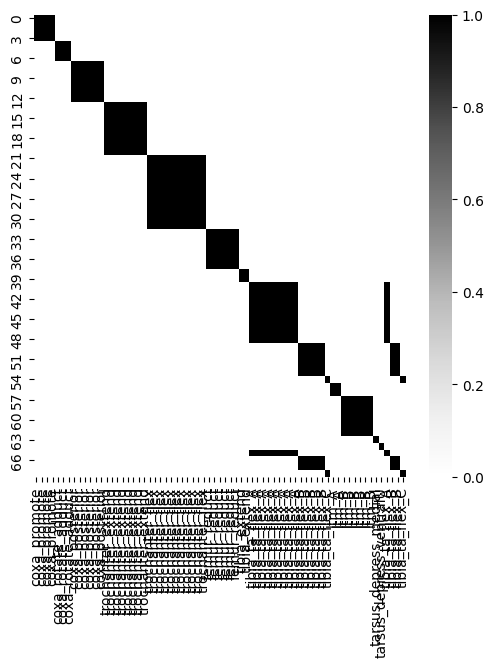

In [33]:
sim_mat_all = cosine_similarity(pre_to_mn_df.to_numpy().transpose())
sim_mat_local = cosine_similarity(pre_to_mn_df.loc['local',:].to_numpy().transpose())
sim_mat_desc = cosine_similarity(pre_to_mn_df.loc['descending',:].to_numpy().transpose())
sim_mat_inter = cosine_similarity(pre_to_mn_df.loc['intersegmental',:].to_numpy().transpose())
sim_mat_ascending = cosine_similarity(pre_to_mn_df.loc['ascending',:].to_numpy().transpose())
sim_mat_sensory = cosine_similarity(pre_to_mn_df.loc['sensory',:].to_numpy().transpose())

tril_mask = np.full((sim_mat_all.shape[0], sim_mat_all.shape[1]), True, dtype=bool)
motor_pool_mask = np.full((sim_mat_all.shape[0], sim_mat_all.shape[1]), False, dtype=bool)
i_index = np.full((sim_mat_all.shape[0], sim_mat_all.shape[1]), 0, dtype=int)
j_index = np.full((sim_mat_all.shape[0], sim_mat_all.shape[1]), 0, dtype=int)
for i in range(motor_pool_mask.shape[0]):
    for j in range(motor_pool_mask.shape[1]):
        motor_pool_mask[i,j] =(mn_mi_df.iloc[i,:].module==mn_mi_df.iloc[j,:].module)
        i_index[i,j] = i
        j_index[i,j] = j

fig = plt.figure(1, figsize = [6,6])
ax = sns.heatmap(motor_pool_mask, xticklabels=mn_mi_df.module.to_list(),cmap=plt.get_cmap('Greys'))

# fig = plt.figure(2, figsize = [6,6])
# ax = sns.heatmap(np.tril(motor_pool_mask,-1), xticklabels=mn_mi_df.module.to_list(),cmap=plt.get_cmap('Greys'))

tril_mask = np.tril(tril_mask,-1)

pool_arr = mn_mi_df.module.to_numpy()
pool_arr = np.tile(pool_arr.reshape((-1,1)),len(pool_arr))
pool_arr.reshape(-1)

In [34]:
sim_dict = {
    'all_comps':sim_mat_all.reshape(-1),
    'local':sim_mat_local.reshape(-1),
    'desc':sim_mat_desc.reshape(-1),
    'inter':sim_mat_inter.reshape(-1),
    'asce':sim_mat_ascending.reshape(-1),
    'sense':sim_mat_sensory.reshape(-1),
    'pool':pool_arr.reshape(-1),
    'same_pool': motor_pool_mask.reshape(-1),
    'lower_tri':tril_mask.reshape(-1),
    'i_index':i_index.reshape(-1),
    'j_index':j_index.reshape(-1)
    }


In [35]:

sim_compare_df = pd.DataFrame.from_dict(data = sim_dict,orient='columns')
sim_compare_df
# # get rid of upper triangle
sim_compare_df = sim_compare_df.loc[sim_compare_df.lower_tri.to_numpy()]
sim_compare_df


all_comps     local      desc     inter      asce     sense  \
69     0.540194  0.600319  0.233644  0.598933  0.621019  0.203653   
138    0.407421  0.416545  0.030020  0.547802  0.604547  0.201660   
139    0.651206  0.578893  0.181516  0.663638  0.948272  0.247782   
207    0.566548  0.636004  0.120582  0.561198  0.602912  0.000000   
208    0.903296  0.921355  0.657786  0.930293  0.985360  0.702878   
...         ...       ...       ...       ...       ...       ...   
4755   0.194803  0.192938  0.000000  0.415243  0.202448  0.000000   
4756   0.048742  0.029075  0.050498  0.119618  0.205515  0.000000   
4757   0.032949  0.031114  0.160726  0.000000  0.000000  0.000000   
4758   0.039155  0.043778  0.000000  0.054438  0.000000  0.000000   
4759   0.049239  0.041752  0.085389  0.078944  0.037141  0.000000   

                 pool  same_pool  lower_tri  i_index  j_index  
69       coxa_promote       True       True        1        0  
138      coxa_promote       True       True        2        0  
139      coxa_promote       True       True        2        1  
207      coxa_promote       True       True        3        0  
208      coxa_promote       True       True        3        1  
...               ...        ...        ...      ...      ...  
4755  tibia_ta_flex_C      False       True       68       63  
4756  tibia_ta_flex_C      False       True       68       64  
4757  tibia_ta_flex_C      False       True       68       65  
4758  tibia_ta_flex_C      False       True       68       66  
4759  tibia_ta_flex_C      False       True       68       67  

[2346 rows x 11 columns]

# Rain cloud plots if within vs across pool cosine similarity

In [36]:
all(sim_compare_df.lower_tri)
sim_compare_df

all_comps     local      desc     inter      asce     sense  \
69     0.540194  0.600319  0.233644  0.598933  0.621019  0.203653   
138    0.407421  0.416545  0.030020  0.547802  0.604547  0.201660   
139    0.651206  0.578893  0.181516  0.663638  0.948272  0.247782   
207    0.566548  0.636004  0.120582  0.561198  0.602912  0.000000   
208    0.903296  0.921355  0.657786  0.930293  0.985360  0.702878   
...         ...       ...       ...       ...       ...       ...   
4755   0.194803  0.192938  0.000000  0.415243  0.202448  0.000000   
4756   0.048742  0.029075  0.050498  0.119618  0.205515  0.000000   
4757   0.032949  0.031114  0.160726  0.000000  0.000000  0.000000   
4758   0.039155  0.043778  0.000000  0.054438  0.000000  0.000000   
4759   0.049239  0.041752  0.085389  0.078944  0.037141  0.000000   

                 pool  same_pool  lower_tri  i_index  j_index  
69       coxa_promote       True       True        1        0  
138      coxa_promote       True       True        2        0  
139      coxa_promote       True       True        2        1  
207      coxa_promote       True       True        3        0  
208      coxa_promote       True       True        3        1  
...               ...        ...        ...      ...      ...  
4755  tibia_ta_flex_C      False       True       68       63  
4756  tibia_ta_flex_C      False       True       68       64  
4757  tibia_ta_flex_C      False       True       68       65  
4758  tibia_ta_flex_C      False       True       68       66  
4759  tibia_ta_flex_C      False       True       68       67  

[2346 rows x 11 columns]

In [37]:
(~sim_compare_df['same_pool']).sum()+sim_compare_df['same_pool'].sum()

2346

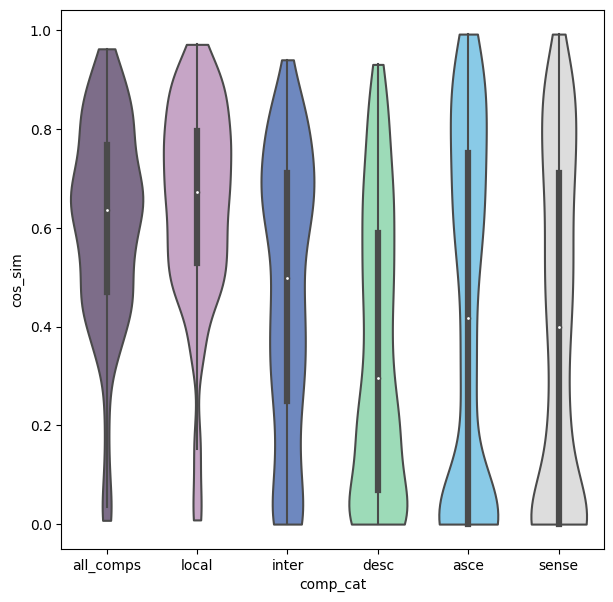

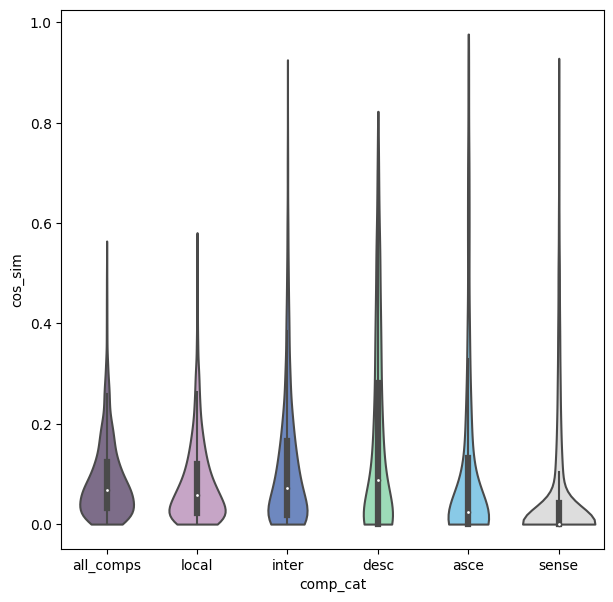

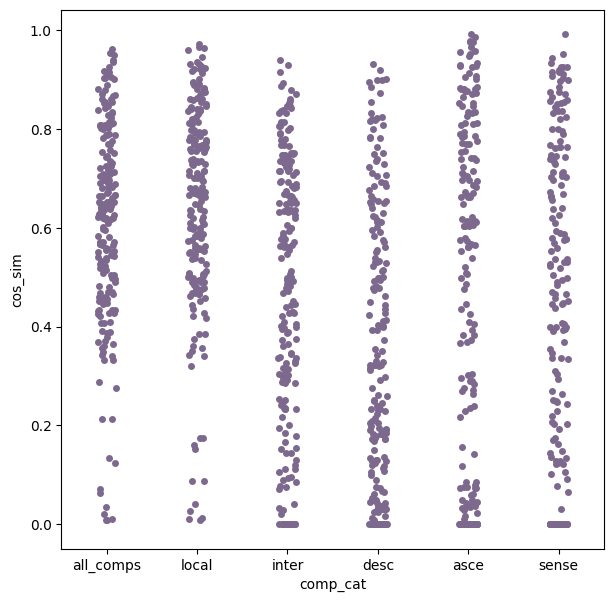

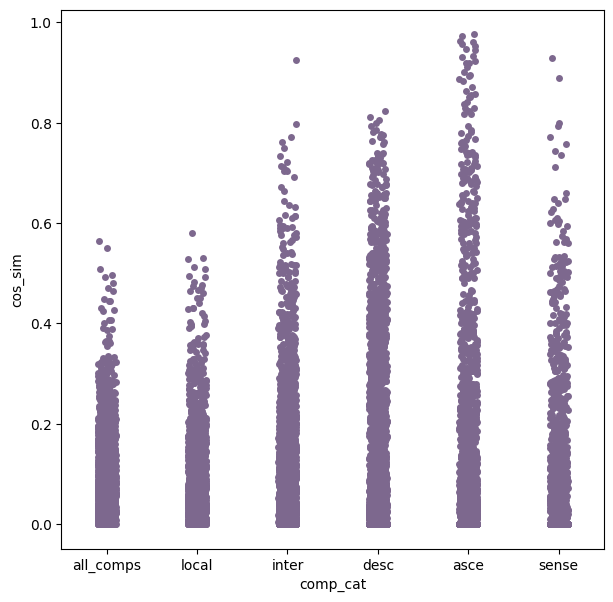

In [38]:
# f, ax = plt.subplots(figsize=(7, 7))
# # seaborn.violinplot(data=pprst, *, x=None, y=None, hue=None, order=None, hue_order=None, bw='scott', cut=2, scale='area', scale_hue=True, gridsize=100, width=0.8, inner='box', split=False, dodge=True, orient=None, linewidth=None, color=None, palette=None, saturation=0.75, ax=None, **kwargs)
# seaborn.violinplot(data=pprst,x='NT',y='pref_perc', orient='vertical',scale='count', cut=0, ax=ax)
# # sns.stripplot(data=pprst,x='NT',y='pref_perc',hue='syn_total',ax=ax)


# f, ax = plt.subplots(figsize=(7, 7))
# sns.violinplot(data=sim_compare_df,x='same_pool',y='all_comps',orient='vertical',scale='area', cut=0, ax=ax)

# sim_same_pool = sim_compare_df.loc[sim_compare_df.same_pool,:]
sim_same_pool_stacked = sim_compare_df.loc[:,['all_comps','pool','same_pool','lower_tri']]
sim_same_pool_stacked['comp_cat'] = 'all_comps'
sim_same_pool_stacked = sim_same_pool_stacked.rename({'all_comps':'cos_sim'},axis='columns')

block = sim_compare_df.loc[:,['local','pool','same_pool','lower_tri']]
block['comp_cat'] = 'local'
block = block.rename({'local':'cos_sim'},axis='columns')

sim_same_pool_stacked = pd.concat([sim_same_pool_stacked,block])
sim_same_pool_stacked

block = sim_compare_df.loc[:,['inter','pool','same_pool','lower_tri']]
block['comp_cat'] = 'inter'
block = block.rename({'inter':'cos_sim'},axis='columns')

sim_same_pool_stacked = pd.concat([sim_same_pool_stacked,block])
sim_same_pool_stacked

block = sim_compare_df.loc[:,['desc','pool','same_pool','lower_tri']]
block['comp_cat'] = 'desc'
block = block.rename({'desc':'cos_sim'},axis='columns')

sim_same_pool_stacked = pd.concat([sim_same_pool_stacked,block])

block = sim_compare_df.loc[:,['asce','pool','same_pool','lower_tri']]
block['comp_cat'] = 'asce'
block = block.rename({'asce':'cos_sim'},axis='columns')

sim_same_pool_stacked = pd.concat([sim_same_pool_stacked,block])

block = sim_compare_df.loc[:,['sense','pool','same_pool','lower_tri']]
block['comp_cat'] = 'sense'
block = block.rename({'sense':'cos_sim'},axis='columns')

sim_same_pool_stacked = pd.concat([sim_same_pool_stacked,block])
sim_same_pool_stacked

# ax.set_ylim([0,1.1])
# f.savefig('./figpanels/cosine_sim_violin_all_comps.svg',format='svg')

# ax.set_ylim([0,1.1])

# f.savefig('./figpanels/pool_pref_by_NT_violin.svg',format='svg')

f, ax = plt.subplots(figsize=(7, 7))
sns.violinplot(data=sim_same_pool_stacked.loc[sim_same_pool_stacked.same_pool],x='comp_cat',y='cos_sim',orient='vertical',scale='area', cut=0, ax=ax,bw=.25)

f.savefig('./figpanels/cosine_sim_violin_same_pool.svg',format='svg')

f, ax = plt.subplots(figsize=(7, 7))
sns.violinplot(data=sim_same_pool_stacked.loc[~sim_same_pool_stacked.same_pool,:],x='comp_cat',y='cos_sim',orient='vertical',scale='area', cut=0, ax=ax,bw=.25)

f.savefig('./figpanels/cosine_sim_violin_different_pools.svg',format='svg')


f, ax = plt.subplots(figsize=(7, 7))
sns.stripplot(data=sim_same_pool_stacked.loc[sim_same_pool_stacked.same_pool],x='comp_cat',y='cos_sim',ax=ax)

f.savefig('./figpanels/cosine_sim_rain_same_pool.svg',format='svg')

f, ax = plt.subplots(figsize=(7, 7))
sns.stripplot(data=sim_same_pool_stacked.loc[~sim_same_pool_stacked.same_pool,:],x='comp_cat',y='cos_sim',ax=ax)

f.savefig('./figpanels/cosine_sim_rain_different_pools.svg',format='svg')

In [39]:
# Stats

In [40]:
sim_w_pool = sim_compare_df.loc[sim_compare_df['same_pool'],:]
sim_w_pool.melt(value_vars=['all_comps','local','desc','inter'])

variable     value
0    all_comps  0.540194
1    all_comps  0.407421
2    all_comps  0.651206
3    all_comps  0.566548
4    all_comps  0.903296
..         ...       ...
819      inter  0.777897
820      inter  0.252746
821      inter  0.693053
822      inter  0.111971
823      inter  0.751578

[824 rows x 2 columns]

In [41]:
import scipy
scipy.stats.kruskal(sim_w_pool['all_comps'],
                    sim_w_pool['local'],
                    sim_w_pool['desc'],
                    sim_w_pool['inter'],)
# scipy.stats.kruskal(ratiodf.iloc[:,0],ratiodf.iloc[:,1],ratiodf.iloc[:,2],ratiodf.iloc[:,3],ratiodf.iloc[:,4],ratiodf.iloc[:,5],ratiodf.iloc[:,6],ratiodf.iloc[:,7],ratiodf.iloc[:,8])

KruskalResult(statistic=138.51328982068745, pvalue=7.906953687514551e-30)

In [42]:
import scikit_posthocs 

scikit_posthocs.posthoc_conover(sim_w_pool.melt(value_vars=['all_comps','local','desc','inter']),val_col= 'value',group_col='variable',p_adjust='holm')


all_comps          desc         inter         local
all_comps  1.000000e+00  7.907326e-21  9.332708e-07  6.729698e-02
desc       7.907326e-21  1.000000e+00  7.984830e-06  2.743378e-28
inter      9.332708e-07  7.984830e-06  1.000000e+00  2.257315e-11
local      6.729698e-02  2.743378e-28  2.257315e-11  1.000000e+00

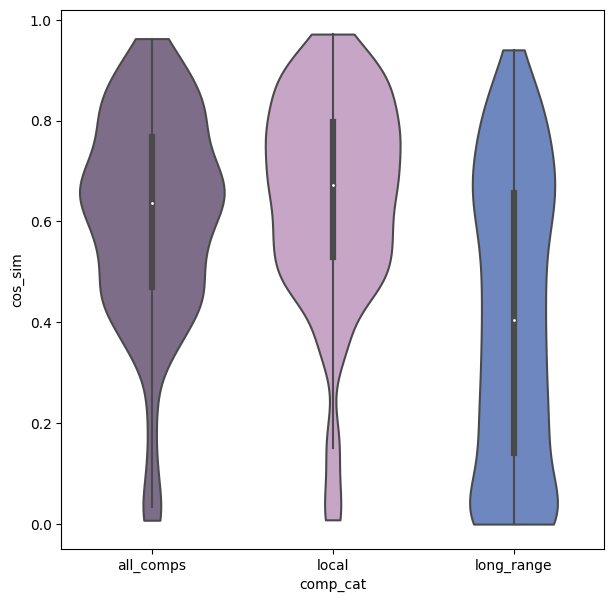

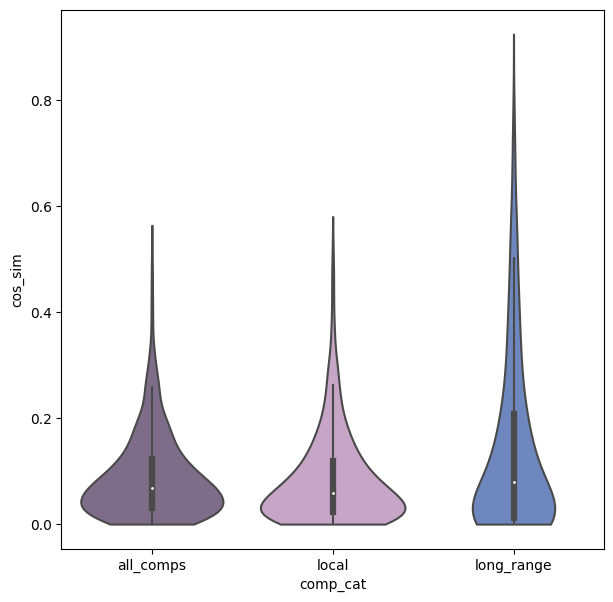

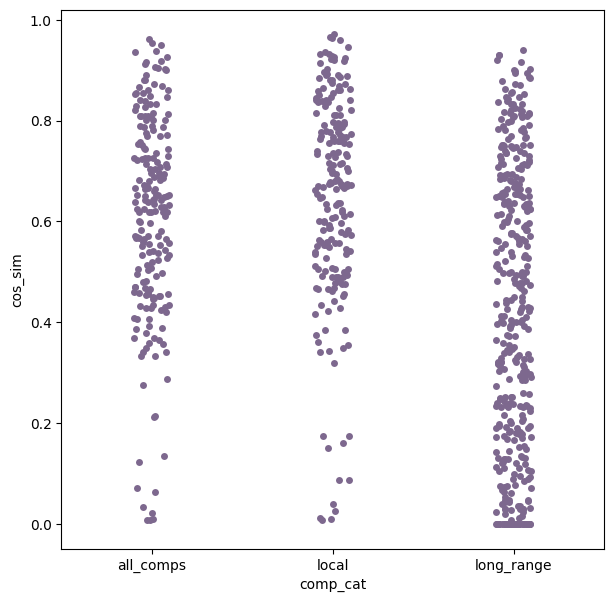

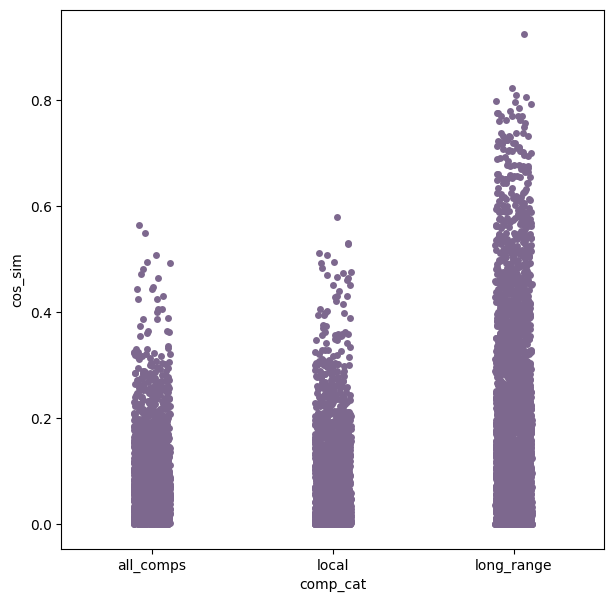

In [43]:
# f, ax = plt.subplots(figsize=(7, 7))
# # seaborn.violinplot(data=pprst, *, x=None, y=None, hue=None, order=None, hue_order=None, bw='scott', cut=2, scale='area', scale_hue=True, gridsize=100, width=0.8, inner='box', split=False, dodge=True, orient=None, linewidth=None, color=None, palette=None, saturation=0.75, ax=None, **kwargs)
# seaborn.violinplot(data=pprst,x='NT',y='pref_perc', orient='vertical',scale='count', cut=0, ax=ax)
# # sns.stripplot(data=pprst,x='NT',y='pref_perc',hue='syn_total',ax=ax)


# f, ax = plt.subplots(figsize=(7, 7))
# sns.violinplot(data=sim_compare_df,x='same_pool',y='all_comps',orient='vertical',scale='area', cut=0, ax=ax)

# sim_same_pool = sim_compare_df.loc[sim_compare_df.same_pool,:]
sim_same_pool_stacked = sim_compare_df.loc[:,['all_comps','pool','same_pool','lower_tri']]
sim_same_pool_stacked['comp_cat'] = 'all_comps'
sim_same_pool_stacked = sim_same_pool_stacked.rename({'all_comps':'cos_sim'},axis='columns')

block = sim_compare_df.loc[:,['local','pool','same_pool','lower_tri']]
block['comp_cat'] = 'local'
block = block.rename({'local':'cos_sim'},axis='columns')

sim_same_pool_stacked = pd.concat([sim_same_pool_stacked,block])
sim_same_pool_stacked

block = sim_compare_df.loc[:,['inter','pool','same_pool','lower_tri']]
block['comp_cat'] = 'long_range'
block = block.rename({'inter':'cos_sim'},axis='columns')

sim_same_pool_stacked = pd.concat([sim_same_pool_stacked,block])
sim_same_pool_stacked

block = sim_compare_df.loc[:,['desc','pool','same_pool','lower_tri']]
block['comp_cat'] = 'long_range'
block = block.rename({'desc':'cos_sim'},axis='columns')

sim_same_pool_stacked = pd.concat([sim_same_pool_stacked,block])
sim_same_pool_stacked

# ax.set_ylim([0,1.1])
# f.savefig('./figpanels/cosine_sim_violin_all_comps.svg',format='svg')

# ax.set_ylim([0,1.1])

# f.savefig('./figpanels/pool_pref_by_NT_violin.svg',format='svg')

f, ax = plt.subplots(figsize=(7, 7))
sns.violinplot(data=sim_same_pool_stacked.loc[sim_same_pool_stacked.same_pool],x='comp_cat',y='cos_sim',orient='vertical',scale='area', cut=0, ax=ax,bw=.25)

f.savefig('./figpanels/cosine_sim_violin_same_pool_long.svg',format='svg')

f, ax = plt.subplots(figsize=(7, 7))
sns.violinplot(data=sim_same_pool_stacked.loc[~sim_same_pool_stacked.same_pool,:],x='comp_cat',y='cos_sim',orient='vertical',scale='area', cut=0, ax=ax, bw=.3)

f.savefig('./figpanels/cosine_sim_violin_different_pools_long.svg',format='svg')


f, ax = plt.subplots(figsize=(7, 7))
sns.stripplot(data=sim_same_pool_stacked.loc[sim_same_pool_stacked.same_pool],x='comp_cat',y='cos_sim',ax=ax)

f.savefig('./figpanels/cosine_sim_rain_same_pool_long.svg',format='svg')

f, ax = plt.subplots(figsize=(7, 7))
sns.stripplot(data=sim_same_pool_stacked.loc[~sim_same_pool_stacked.same_pool,:],x='comp_cat',y='cos_sim',ax=ax)

f.savefig('./figpanels/cosine_sim_rain_different_pools_long.svg',format='svg')

# Stats

In [44]:
# Simple version, just mean and std of same pool, not same pool
x = sim_compare_df.loc[sim_compare_df.same_pool,'local'].mean()
y = sim_compare_df.loc[sim_compare_df.same_pool,'inter'].mean()

x2 = sim_compare_df.loc[~sim_compare_df.same_pool,'local'].mean()
y2 = sim_compare_df.loc[~sim_compare_df.same_pool,'inter'].mean()


In [45]:
import scipy

scipy.stats.ttest_rel(sim_compare_df.loc[sim_compare_df.same_pool,'local'],sim_compare_df.loc[sim_compare_df.same_pool,'all_comps'],alternative='two-sided',axis=0)

TtestResult(statistic=14.306070848287028, pvalue=1.1887969249041448e-32, df=205)

In [46]:
sim_compare_df.loc[~sim_compare_df.same_pool,'local'].to_numpy()

array([0.11003136, 0.15649968, 0.50878596, ..., 0.03111374, 0.04377802,
       0.0417517 ])